In [2]:
!pip install ultralytics==8.0.196 roboflow inference_sdk

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VkrKPKAstENj4TfNwawv")
project = rf.workspace("project-group13").project("dental-caries-detection-using-dl")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Dental-Caries-Detection-using-DL-9 in yolov8:: 100%|██████████| 5788/5788 [00:01<00:00, 3978.40it/s]


In [4]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 400MB/s]
New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Dental-Caries-Detection-using-DL-9/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

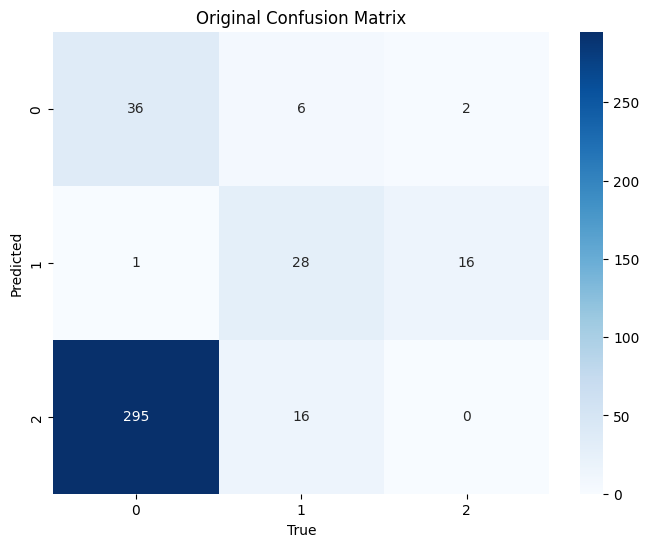

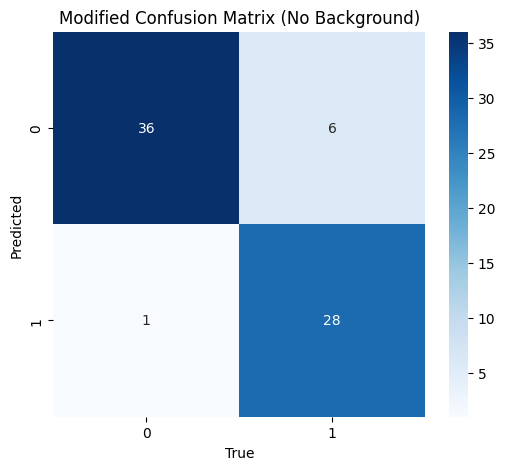

Accuracy: 0.9014084507042254
Precision: [    0.97297     0.82353]
Recall: [    0.85714     0.96552]
F1-score: [    0.91139     0.88889]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assume this is your original confusion matrix
original_confusion_matrix = np.array([
    [36, 6, 2],
    [1, 28, 16],
    [295, 16, 0]
])

# Display the original confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(original_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Original Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

# Remove the background class (3rd row and column)
modified_confusion_matrix = original_confusion_matrix[:2, :2]

# Display the modified confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(modified_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Modified Confusion Matrix (No Background)')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for the modified confusion matrix
accuracy = np.trace(modified_confusion_matrix) / np.sum(modified_confusion_matrix)
precision = np.diag(modified_confusion_matrix) / np.sum(modified_confusion_matrix, axis=0)
recall = np.diag(modified_confusion_matrix) / np.sum(modified_confusion_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Replace NaNs with 0 for f1_score
f1 = np.nan_to_num(f1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

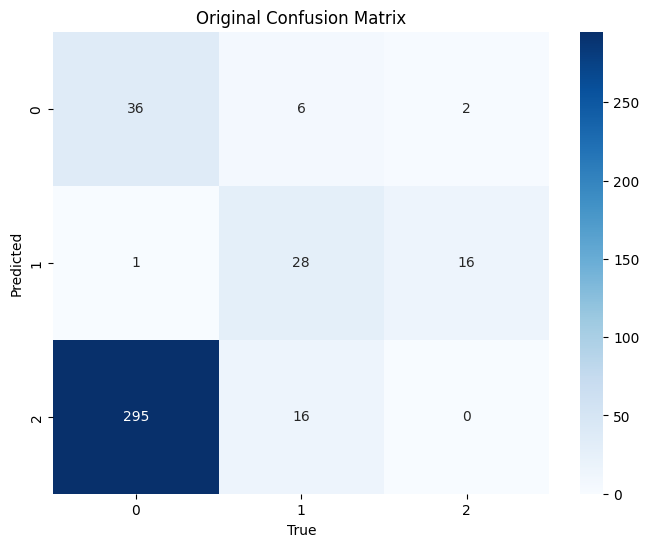

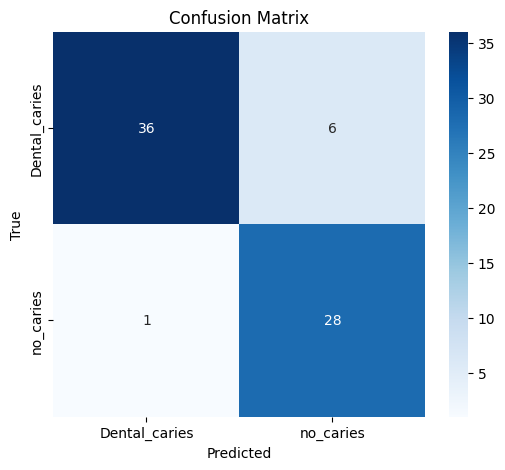

Accuracy: 0.9014084507042254
Precision: [0.97297297 0.82352941]
Recall: [0.85714286 0.96551724]
F1-score: [0.91139241 0.88888889]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assume this is your original confusion matrix
original_confusion_matrix = np.array([
    [36, 6, 2],
    [1, 28, 16],
    [295, 16, 0]
])

# Display the original confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(original_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Original Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

# Remove the background class (3rd row and column)
modified_confusion_matrix = original_confusion_matrix[:2, :2]

# Display the modified confusion matrix with new title and labels
plt.figure(figsize=(6, 5))
ax = sns.heatmap(modified_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Dental_caries', 'no_caries'], yticklabels=['Dental_caries', 'no_caries'])
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

# Calculate accuracy, precision, recall, and F1-score for the modified confusion matrix
accuracy = np.trace(modified_confusion_matrix) / np.sum(modified_confusion_matrix)
precision = np.diag(modified_confusion_matrix) / np.sum(modified_confusion_matrix, axis=0)
recall = np.diag(modified_confusion_matrix) / np.sum(modified_confusion_matrix, axis=1)
f1 = 2 * (precision * recall) / (precision + recall)

# Replace NaNs with 0 for f1_score
f1 = np.nan_to_num(f1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)